In [118]:
import numpy as np
from tensorflow import keras
from keras import models 
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# mnist

In [240]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28*28))) 
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dense(10, activation='softmax')) 
net.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

# preprocessing
X_train = X_train.reshape((60000, 28*28))
X_train = X_train/255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test/255

In [241]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [242]:
val = net.fit(partial_X_train,partial_y_train,epochs=20, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/20
391/391 [==============================] - 8s 21ms/step - loss: 0.2334 - acc: 0.9284 - val_loss: 0.1053 - val_acc: 0.9676
Epoch 2/20
391/391 [==============================] - 8s 19ms/step - loss: 0.0809 - acc: 0.9745 - val_loss: 0.0861 - val_acc: 0.9746
Epoch 3/20
391/391 [==============================] - 8s 20ms/step - loss: 0.0536 - acc: 0.9829 - val_loss: 0.0914 - val_acc: 0.9743
Epoch 4/20
391/391 [==============================] - 8s 21ms/step - loss: 0.0365 - acc: 0.9882 - val_loss: 0.2015 - val_acc: 0.9520
Epoch 5/20
391/391 [==============================] - 8s 19ms/step - loss: 0.0321 - acc: 0.9896 - val_loss: 0.0925 - val_acc: 0.9758
Epoch 6/20
391/391 [==============================] - 8s 20ms/step - loss: 0.0239 - acc: 0.9921 - val_loss: 0.0904 - val_acc: 0.9765
Epoch 7/20
391/391 [==============================] - 8s 20ms/step - loss: 0.0246 - acc: 0.9922 - val_loss: 0.0864 - val_acc: 0.9781
Epoch 8/20
391/391 [==============================] - 8s 20ms/step - 

In [243]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']

Text(0.5, 1.0, 'accuracy')

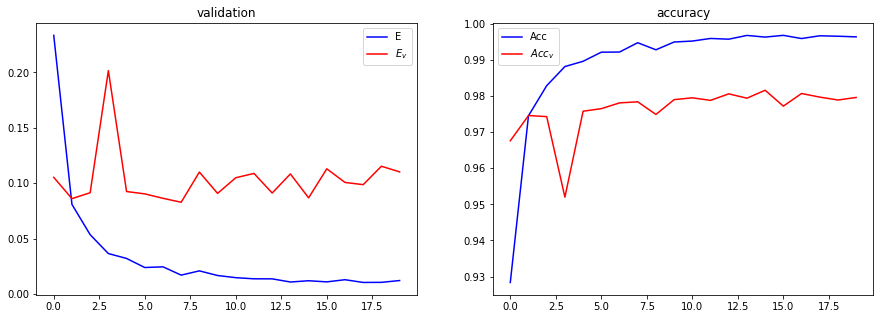

In [256]:
acc = val_dict['acc']
val_acc = val_dict['val_acc']

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(loss,'b-',label='E')
plt.plot(val_loss,'r-',label='$E_v$')
plt.legend()
plt.title('validation')

plt.subplot(122)
plt.plot(acc,'b-',label='Acc')
plt.plot(val_acc,'r-',label='$Acc_v$')
plt.legend()
plt.title('accuracy')

In [245]:
test_loss, test_acc = net.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0975 - acc: 0.9796


In [258]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
model.add(layers.Dropout(0.5))  
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dropout(0.5))  
model.add(layers.Dense(10, activation='softmax')) 
model.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

In [232]:
val2= model.fit(partial_X_train,partial_y_train,epochs=20, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/20
391/391 [==============================] - 6s 16ms/step - loss: 0.3760 - acc: 0.8841 - val_loss: 0.1442 - val_acc: 0.9579
Epoch 2/20
391/391 [==============================] - 6s 15ms/step - loss: 0.1691 - acc: 0.9485 - val_loss: 0.1019 - val_acc: 0.9695
Epoch 3/20
391/391 [==============================] - 6s 15ms/step - loss: 0.1302 - acc: 0.9601 - val_loss: 0.0896 - val_acc: 0.9720
Epoch 4/20
391/391 [==============================] - 6s 15ms/step - loss: 0.1112 - acc: 0.9664 - val_loss: 0.0855 - val_acc: 0.9749
Epoch 5/20
391/391 [==============================] - 6s 16ms/step - loss: 0.0962 - acc: 0.9695 - val_loss: 0.0763 - val_acc: 0.9775
Epoch 6/20
391/391 [==============================] - 6s 15ms/step - loss: 0.0856 - acc: 0.9732 - val_loss: 0.0790 - val_acc: 0.9775
Epoch 7/20
391/391 [==============================] - 6s 15ms/step - loss: 0.0793 - acc: 0.9745 - val_loss: 0.0683 - val_acc: 0.9808
Epoch 8/20
391/391 [==============================] - 6s 15ms/step - 

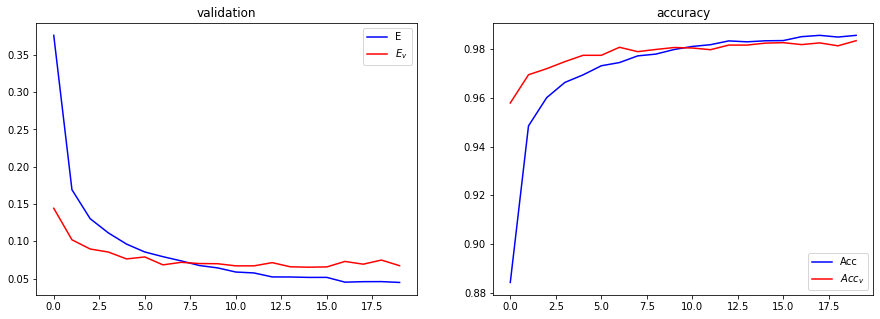

In [259]:
val2_dict = val2.history
loss2 = val2_dict['loss']
val2_loss = val2_dict['val_loss']
acc2 = val2_dict['acc']
val2_acc = val2_dict['val_acc']

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(loss2,'b-',label='E')
plt.plot(val2_loss,'r-',label='$E_v$')
plt.title('validation')
plt.legend()

plt.subplot(122)
plt.plot(acc2,'b-',label='Acc')
plt.plot(val2_acc,'r-',label='$Acc_v$')
plt.title('accuracy')
plt.legend()

In [246]:
test_loss, test_acc = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0626 - acc: 0.9822


총 6만개의 데이터 셋 중 5만개를 train, 1만개를 val셋으로 나누었다. val 셋을 학습시킨 후 피팅을 한 뒤에 history그래프를 확인하면 데이터 셋과 val 셋의 차이가 큰 것을 볼 수 있다. 이를 보정하기 위해 dropout을 해주고 다시 피팅하면 확연히 줄어든 차이를 볼 수 있다. droput하지 않은 데이터 셋에 대한 정확도는 97.9%, 보정한 데이터 셋에 대해선 98.2%의 정확도가 나왔다. 